In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Data Prep

In [2]:
data = pd.read_csv('training_v2.csv')

Select only the comorbidity features

In [3]:
df = data.loc[:, (data.columns[176:184])]
for i in df.columns:
    print(i)

aids
cirrhosis
diabetes_mellitus
hepatic_failure
immunosuppression
leukemia
lymphoma
solid_tumor_with_metastasis


In [4]:
# fill nan with 0
df.fillna(0, inplace = True)

# filter for patients with at least 1 comorbidity
df = df.loc[(df!=0).any(axis=1)] 

# sample first 1000 patients
x = df.iloc[:1000]

### t-SNE

In [5]:
tsne = TSNE(n_components=2, verbose=1, random_state=42, perplexity = 50)
z = tsne.fit_transform(x) 

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.007s...
[t-SNE] Computed neighbors for 1000 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.693985
[t-SNE] KL divergence after 1000 iterations: 0.423586


[Text(0.5, 1.0, 'Medical History T-SNE projection')]

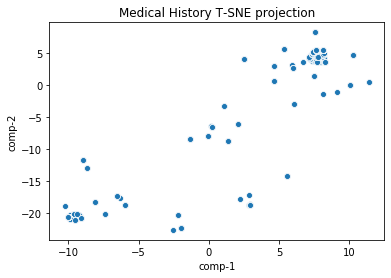

In [6]:
df = pd.DataFrame()

df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2",
                palette=sns.color_palette("hls", 3),
                data=df).set(title="Medical History T-SNE projection") 

### Kmeans clustering
Looks like some clusters are well defined. Eventually we can tune this to find the optimal number. I'm picking 5 for now

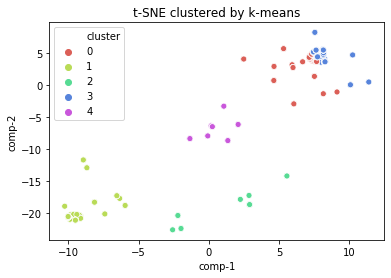

In [8]:
cluster = 5
kmeans = KMeans(n_clusters=cluster, random_state=0).fit(df)
df['cluster'] = kmeans.labels_
sns.scatterplot(x="comp-1", y="comp-2",
                palette=sns.color_palette("hls", cluster),
                data=df, hue = 'cluster').set(title="t-SNE clustered by k-means") 
plt.savefig('tsne.png')